In [1]:
### 18/06/2025 
### preprocessing and qc of objects 
# libraries 
import pandas as pd
import scanpy as sc
import scrublet as scr
import numpy as np
# plotting 
%matplotlib inline


In [ ]:
### read in data and form into anndata objects
# create function 
def create_anndata(sample_dict):
    """
    Create AnnData objects from a dictionary of sample names and file paths.

    Parameters:
    - sample_dict (dict): keys are sample names, values are file paths to .dge.txt files

    Returns:
    - dict: keys are sample names, values are AnnData objects
    """
    adatas = {}

    for sample_name, file_path in sample_dict.items():
        print(f"Processing {sample_name}...")
        
        # Load the count matrix
        dge = pd.read_csv(file_path, sep="\t", index_col=0)
        dge_T = dge.T

        # Create AnnData object
        adata = sc.AnnData(X=dge_T)
        adata.obs_names = dge_T.index
        adata.var_names = dge_T.columns

        # Add sample name to metadata
        adata.obs["sample"] = sample_name

        # Store in dictionary
        adatas[sample_name] = adata

    return adatas

# set params
sample_paths = {
    "OAC26rT1": "C:/Users/jh9u24/OneDrive - University of Southampton/University/MRes/RPC/OAC_sc_data/Primary Tumour/OAC26rT1/OAC26rT1.dge.txt",
    "OAC26rT2": "C:/Users/jh9u24/OneDrive - University of Southampton/University/MRes/RPC/OAC_sc_data/Primary Tumour/OAC26rT2/OAC26rT2.dge.txt",
    "OAC26rT3": "C:/Users/jh9u24/OneDrive - University of Southampton/University/MRes/RPC/OAC_sc_data/Primary Tumour/OAC26rT3/OAC26rT3.dge.txt",
    "OAC26T1": "C:/Users/jh9u24/OneDrive - University of Southampton/University/MRes/RPC/OAC_sc_data/Primary Tumour/OAC26T1/OAC26T1.dge.txt",
    "OAC26T2": "C:/Users/jh9u24/OneDrive - University of Southampton/University/MRes/RPC/OAC_sc_data/Primary Tumour/OAC26T2/OAC26T2.dge.txt",
    "OAC26T3": "C:/Users/jh9u24/OneDrive - University of Southampton/University/MRes/RPC/OAC_sc_data/Primary Tumour/OAC26T3/OAC26T3.dge.txt",
    "OAC35TJ": "C:/Users/jh9u24/OneDrive - University of Southampton/University/MRes/RPC/OAC_sc_data/Primary Tumour/OAC35TJ/OAC35TJ.dge.txt",
    "OAC35TL": "C:/Users/jh9u24/OneDrive - University of Southampton/University/MRes/RPC/OAC_sc_data/Primary Tumour/OAC35TL/OAC35TL.dge.txt",
}

# run function 
anndata_dict = create_anndata(sample_paths)

# Unpack dictionary into individual AnnData objects
OAC26rT1_adata = anndata_dict["OAC26rT1"]
OAC26rT2_adata = anndata_dict["OAC26rT2"]
OAC26rT3_adata = anndata_dict["OAC26rT3"]
OAC26T1_adata = anndata_dict["OAC26T1"]
OAC26T2_adata = anndata_dict["OAC26T2"]
OAC26T3_adata = anndata_dict["OAC26T3"]
OAC35TJ_adata = anndata_dict["OAC35TJ"]
OAC35TL_adata = anndata_dict["OAC35TL"]


Processing OAC26rT1...
Processing OAC26rT2...
Processing OAC26rT3...
Processing OAC26T1...
Processing OAC26T2...
Processing OAC26T3...
Processing OAC35TJ...
Processing OAC35TL...


In [4]:
### QC 
def run_qc_on_list(*adatas):
    """
    Run QC on a list of AnnData objects and return them in the same order.

    Parameters:
    - *adatas: any number of AnnData objects

    Returns:
    - tuple: the same AnnData objects after QC
    """
    updated = []

    for i, adata in enumerate(adatas):
        print(f"Running QC on sample {i+1}...")

        # Annotate gene types
        adata.var["mt"] = adata.var_names.str.startswith("MT-")  # Mitochondrial
        adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))  # Ribosomal
        adata.var["hb"] = adata.var_names.str.contains(r"^HB(?!P)")  # Hemoglobin (excluding HBP)

        # Compute QC metrics
        sc.pp.calculate_qc_metrics(
            adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
        )

        updated.append(adata)

    return tuple(updated)

OAC26rT1_adata, OAC26rT2_adata, OAC26rT3_adata, OAC26T1_adata, OAC26T2_adata, OAC26T3_adata, OAC35TJ_adata, OAC35TL_adata = run_qc_on_list(
    OAC26rT1_adata, OAC26rT2_adata, OAC26rT3_adata, OAC26T1_adata, OAC26T2_adata, OAC26T3_adata, OAC35TJ_adata, OAC35TL_adata
)


Running QC on sample 1...
Running QC on sample 2...
Running QC on sample 3...
Running QC on sample 4...
Running QC on sample 5...
Running QC on sample 6...
Running QC on sample 7...
Running QC on sample 8...


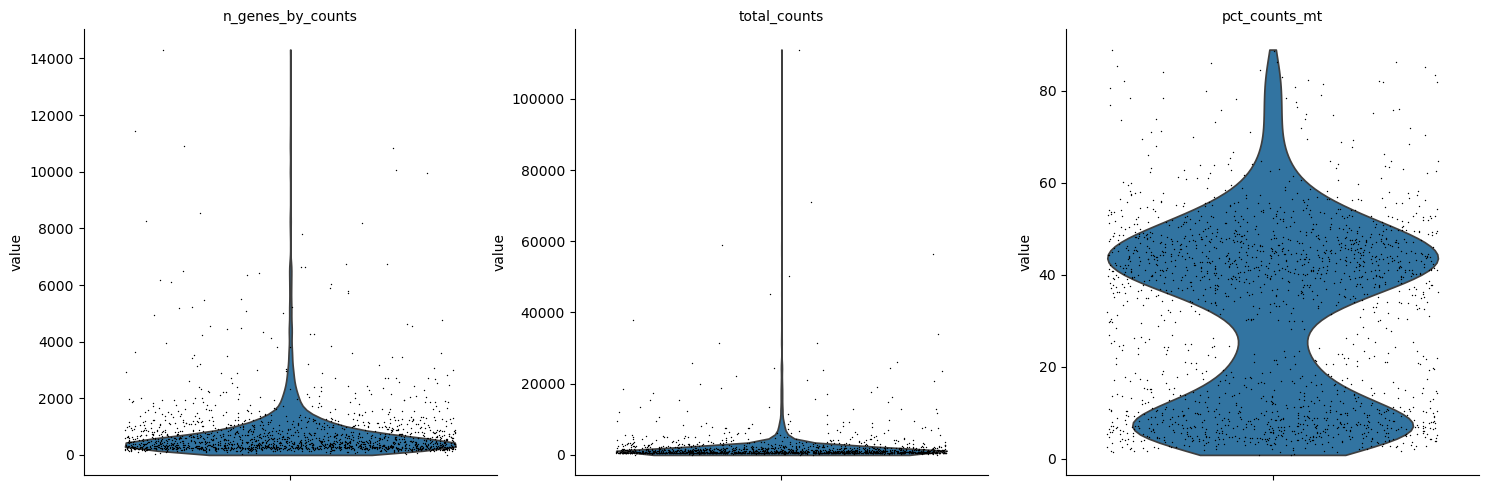

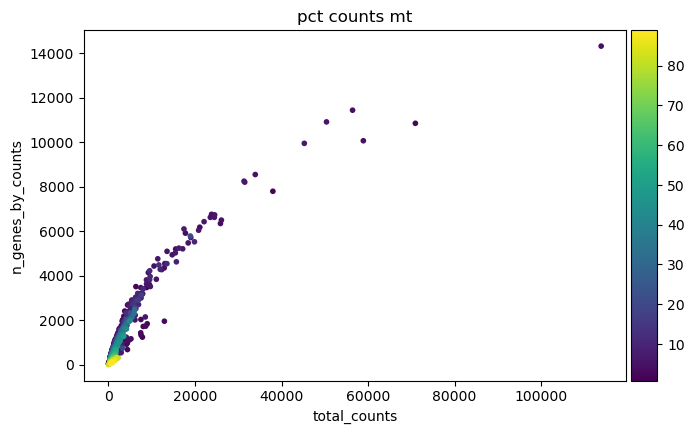

In [5]:
### visualising QC
# OAC26rT1
sc.pl.violin(
    OAC26rT1_adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

sc.pl.scatter(OAC26rT1_adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

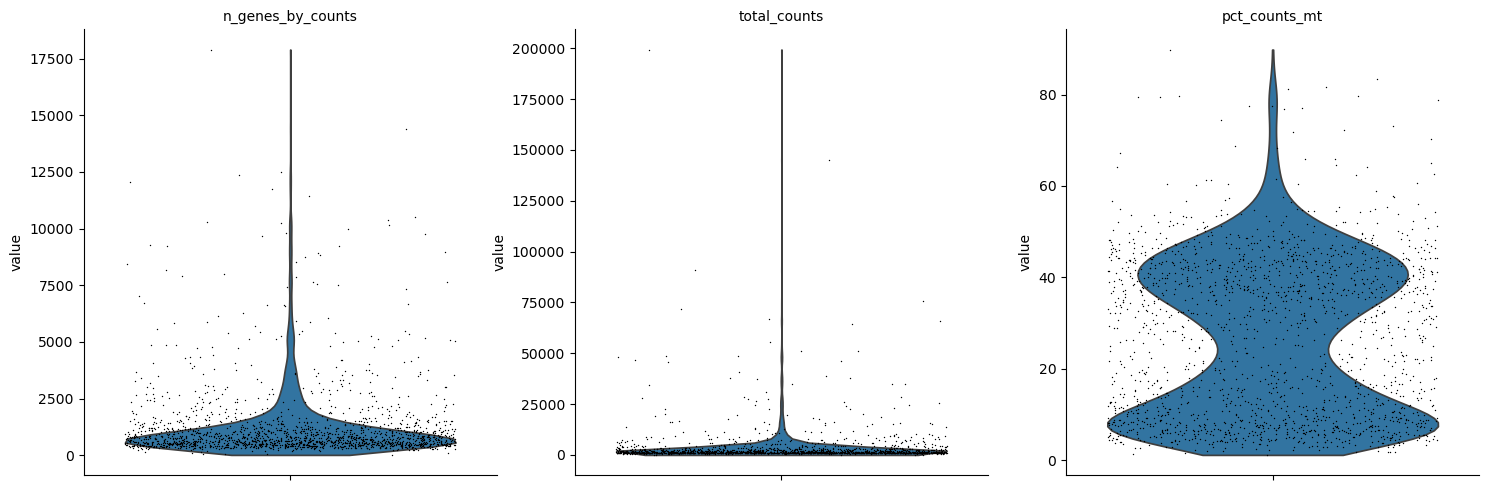

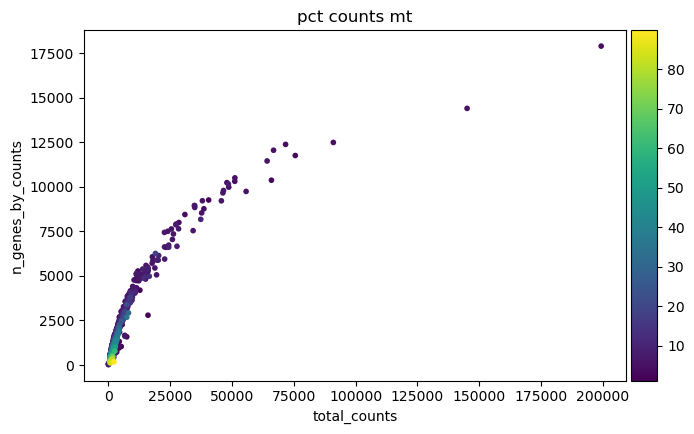

In [6]:
### visualising qc
# OAC26rT2_adata
sc.pl.violin(
    OAC26rT2_adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

sc.pl.scatter(OAC26rT2_adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

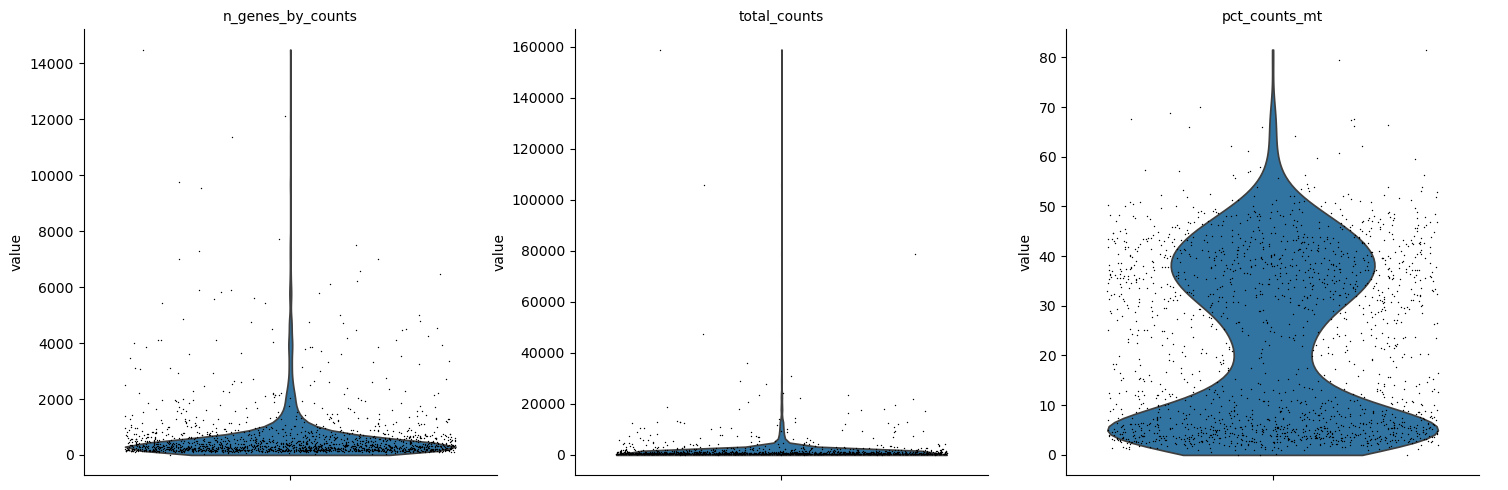

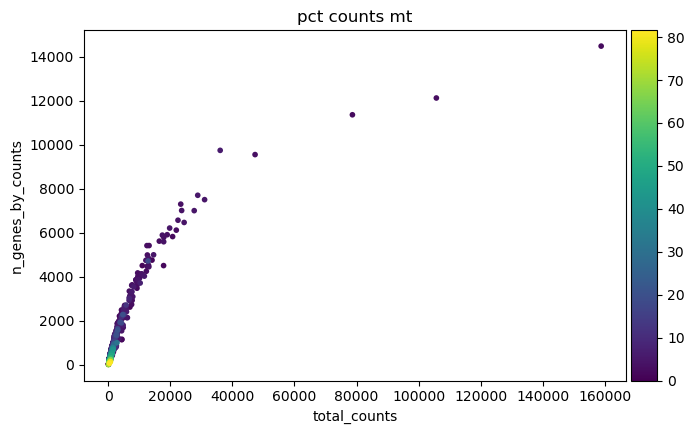

In [7]:
### visualising qc
# OAC26rT3_adata
sc.pl.violin(
    OAC26rT3_adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

sc.pl.scatter(OAC26rT3_adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

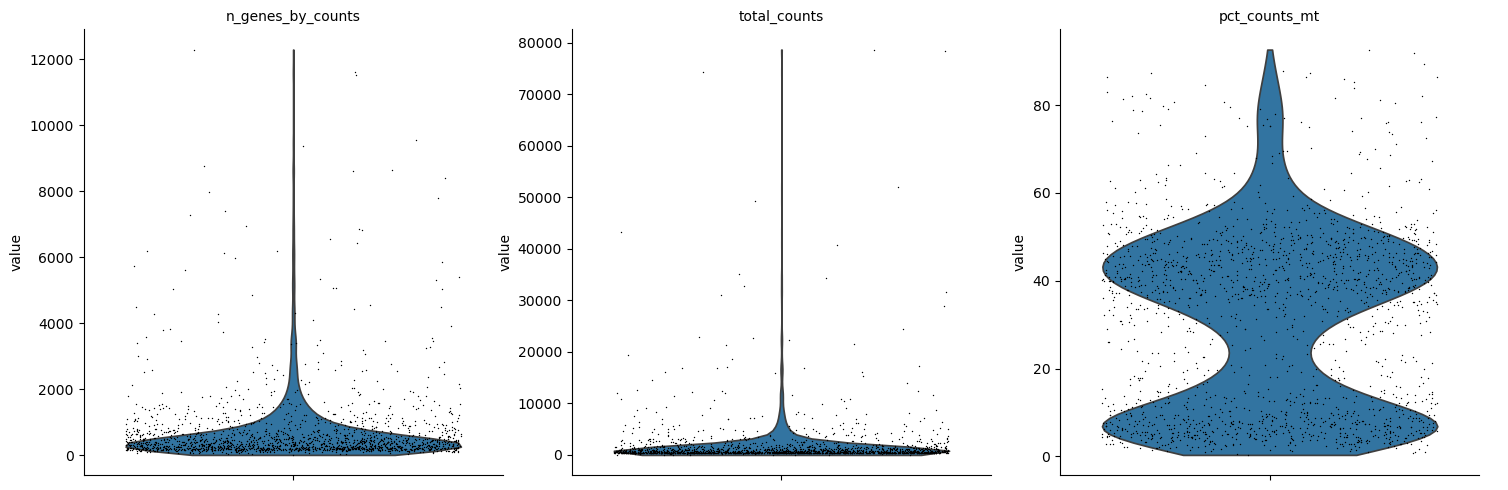

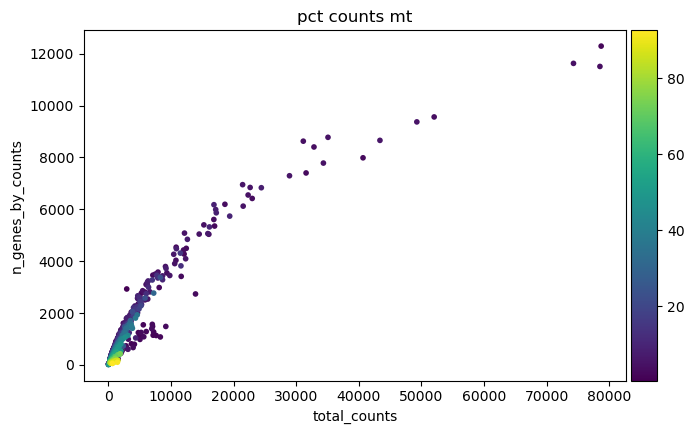

In [8]:
### visualising qc
# OAC26T1_adata
sc.pl.violin(
    OAC26T1_adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

sc.pl.scatter(OAC26T1_adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

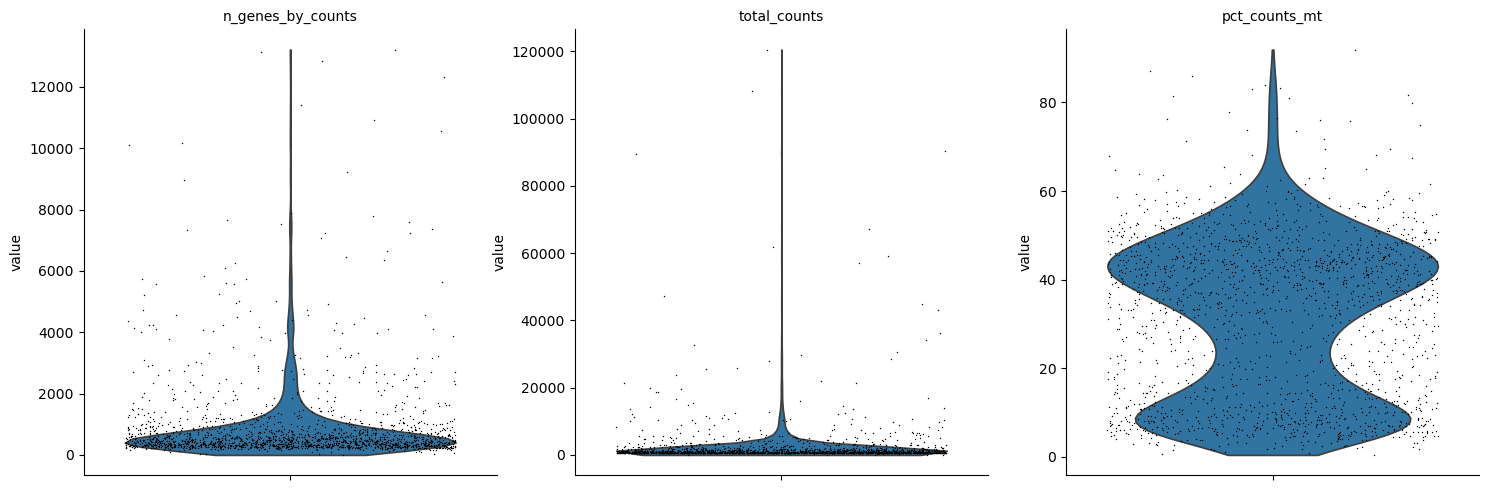

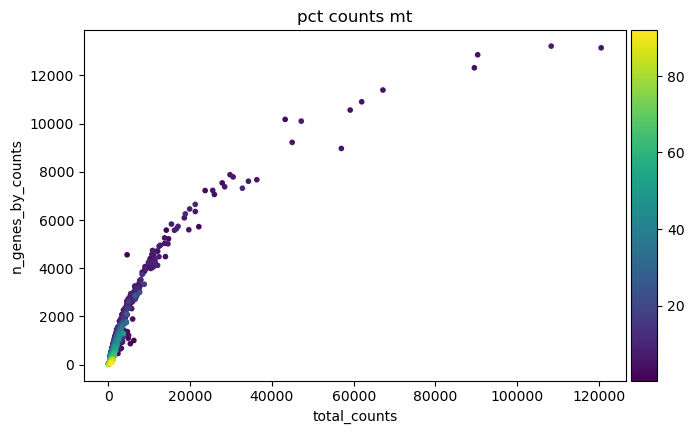

In [9]:
### visualising qc
# OAC26T2_adata
sc.pl.violin(
    OAC26T2_adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

sc.pl.scatter(OAC26T2_adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

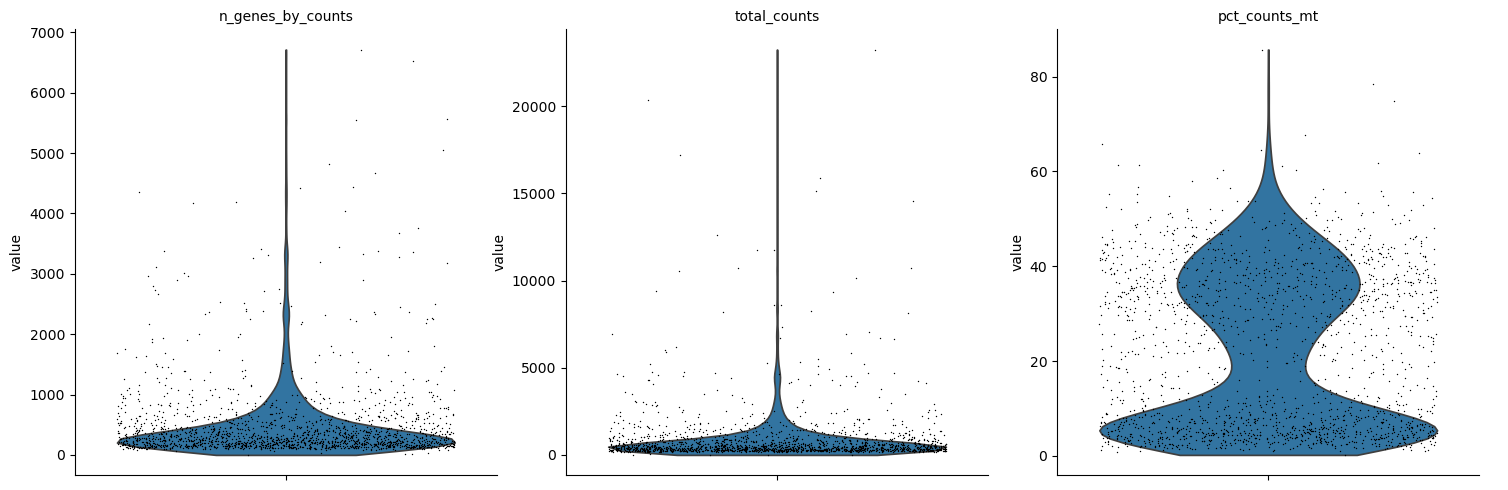

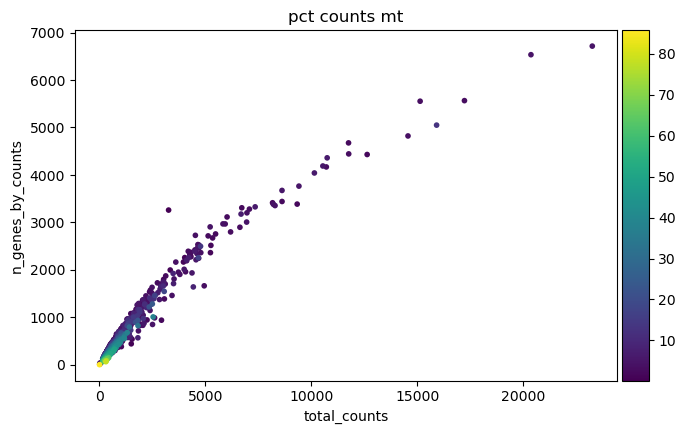

In [10]:
### visualising qc
# OAC26T3_adata
sc.pl.violin(
    OAC26T3_adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

sc.pl.scatter(OAC26T3_adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

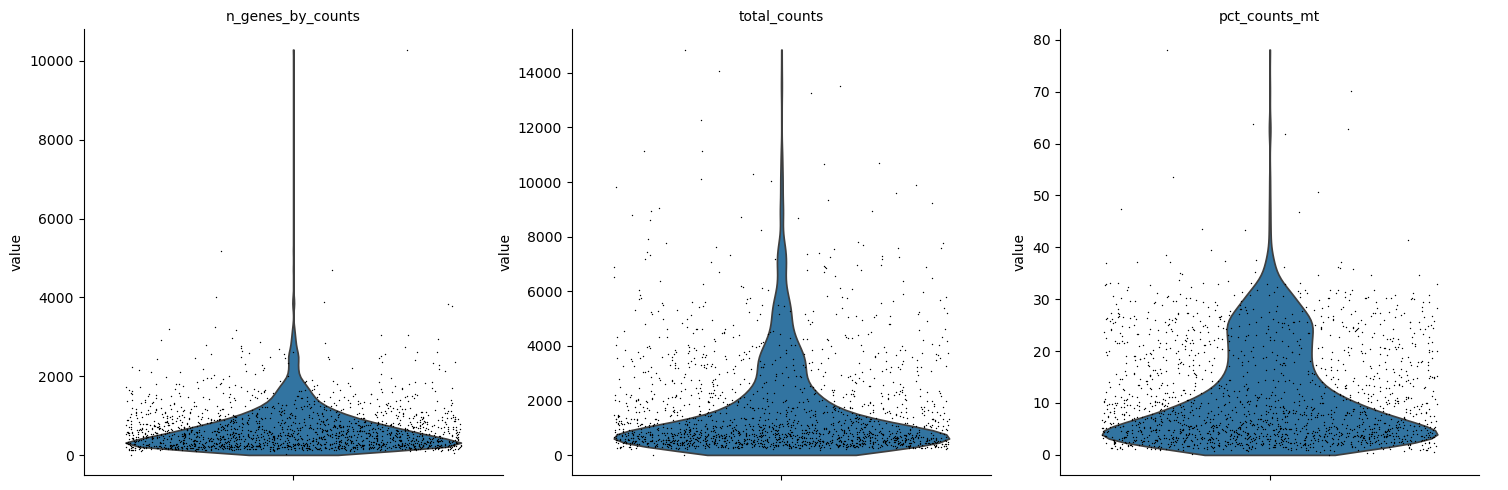

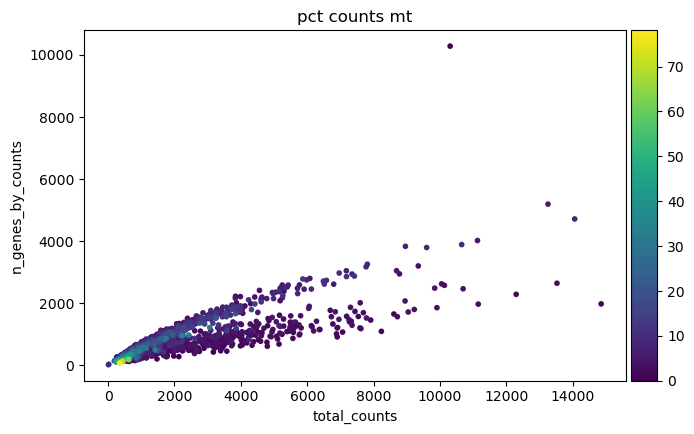

In [11]:
### visualising qc
# OAC35TJ_adata
sc.pl.violin(
    OAC35TJ_adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

sc.pl.scatter(OAC35TJ_adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

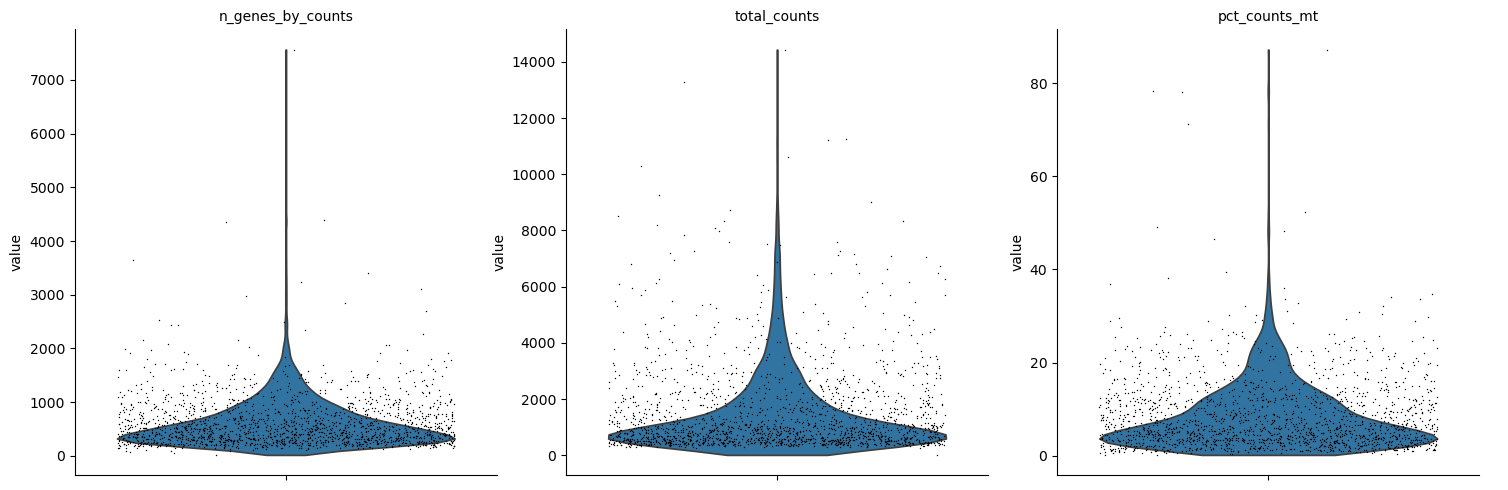

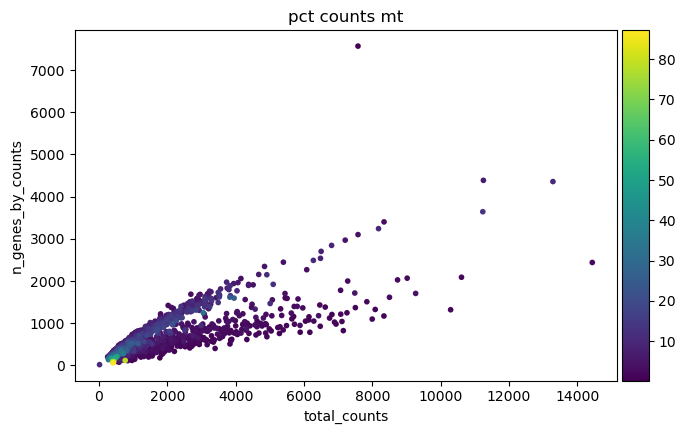

In [12]:
### visualising qc
# OAC35TL_adata
sc.pl.violin(
    OAC35TL_adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

sc.pl.scatter(OAC35TL_adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [13]:
### filtering and doublet detection 
print(OAC26rT1_adata.n_obs)
print(OAC26rT2_adata.n_obs)
print(OAC26rT3_adata.n_obs)
print(OAC26T1_adata.n_obs)
print(OAC26T2_adata.n_obs)
print(OAC26T3_adata.n_obs)
print(OAC35TJ_adata.n_obs)
print(OAC35TL_adata.n_obs)
def filtering(*adatas):
    """
    Filter cells and genes, and run Scrublet for doublet detection on each AnnData object.

    Parameters:
    - *adatas: One or more AnnData objects

    Returns:
    - tuple: Filtered AnnData objects (same order)
    """
    filtered = []

    for i, adata in enumerate(adatas):
        print(f"\nFiltering sample {i+1}...")

        # Filter cells and genes
        sc.pp.filter_cells(adata, min_genes=100)
        sc.pp.filter_genes(adata, min_cells=3)
        # try 10 and then try 15 see what the difference is 
        adata = adata[adata.obs.pct_counts_mt < 10]
        
        print(f"Number of cells: {adata.n_obs}")

        # Run Scrublet
        try:
            sc.pp.scrublet(adata, batch_key="sample")
            print("Scrublet successful")
        except Exception as e:
            print(f"Scrublet failed for sample {i+1}: {e}")

        filtered.append(adata)
        
        print(f"Number of cells: {adata.n_obs}")

    return tuple(filtered)

OAC26rT1_adata, OAC26rT2_adata, OAC26rT3_adata, OAC26T1_adata, OAC26T2_adata, OAC26T3_adata, OAC35TJ_adata, OAC35TL_adata = filtering(
    OAC26rT1_adata, OAC26rT2_adata, OAC26rT3_adata, OAC26T1_adata, OAC26T2_adata, OAC26T3_adata, OAC35TJ_adata, OAC35TL_adata
)



1800
1800
1800
1800
1800
1800
1800
1800

Filtering sample 1...
Number of cells: 435
Scrublet successful
Number of cells: 435

Filtering sample 2...
Number of cells: 473
Scrublet successful
Number of cells: 473

Filtering sample 3...
Number of cells: 676
Scrublet successful
Number of cells: 676

Filtering sample 4...
Number of cells: 484
Scrublet successful
Number of cells: 484

Filtering sample 5...
Number of cells: 347
Scrublet successful
Number of cells: 347

Filtering sample 6...
Number of cells: 729
Scrublet successful
Number of cells: 729

Filtering sample 7...
Number of cells: 1045
Scrublet successful
Number of cells: 1045

Filtering sample 8...
Number of cells: 1238
Scrublet successful
Number of cells: 1238


In [15]:
### merge datasets 
# concat
OAC_pt = sc.concat([OAC26rT1_adata, OAC26rT2_adata, OAC26rT3_adata, OAC26T1_adata, OAC26T2_adata, OAC26T3_adata, OAC35TJ_adata, OAC35TL_adata], join='outer', label='batch', keys=['OAC26rT1', 'OAC26rT2', 'OAC26rT3', 'OAC26T1', 'OAC26T2', 'OAC26T3', 'OAC35TJ', 'OAC35TL'])



c:\Users\jh9u24\AppData\Local\r-miniconda\envs\sctoolkit_3.12\Lib\site-packages\anndata\_core\anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


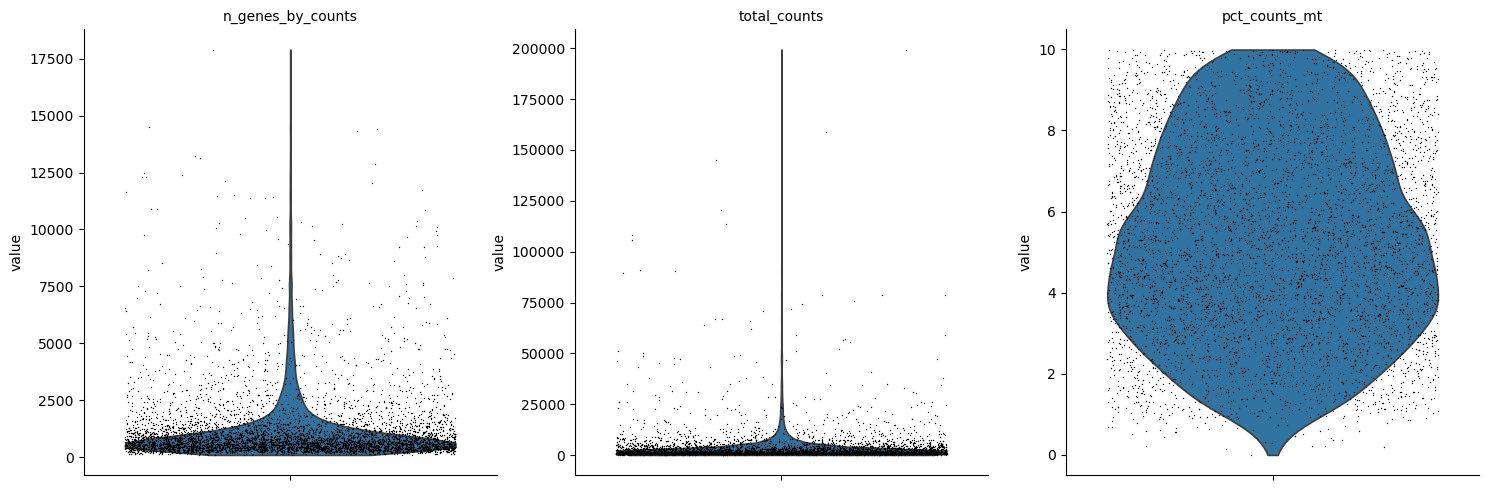

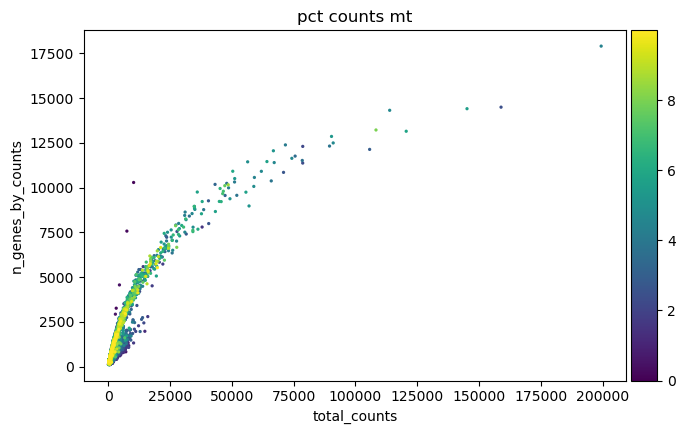

In [16]:
### QC check again 

sc.pl.violin(
    OAC_pt,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

sc.pl.scatter(OAC_pt, "total_counts", "n_genes_by_counts", color="pct_counts_mt")



In [17]:
# save the anndata obj:
# Save the AnnData object (optional)
OAC_pt.write("C:/Users/jh9u24/OneDrive - University of Southampton/University/MRes/RPC/OAC_sc_data/Primary Tumour/OAC_pt.h5ad")

